## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.


### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).



### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [3]:
# !wget wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [ ]:
!head car_fuel_efficiency.csv

engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
170,3,159,3413.433758606219,17.7,2003,Europe,Gasoline,All-wheel drive,0,13.231728906241411
130,5,97,3149.6649342200353,17.8,2007,USA,Gasoline,Front-wheel drive,0,13.688217435463793
170,,78,3079.03899736884,15.1,2018,Europe,Gasoline,Front-wheel drive,0,14.246340998160866
220,4,,2542.392401828378,20.2,2009,USA,Diesel,All-wheel drive,2,16.91273559598635
210,1,140,3460.870989989018,14.4,2009,Europe,Gasoline,All-wheel drive,2,12.488369121964562
190,3,,2484.883986036068,14.7,2008,Europe,Gasoline,All-wheel drive,-1,17.271818372724237
240,7,127,3006.5422872171457,22.2,2012,USA,Gasoline,Front-wheel drive,1,13.210412112385608
150,4,239,3638.6577802809,17.3,2020,USA,Diesel,All-wheel drive,1,12.848883861524026
250,1,174,2714.219309645285,10.3,2016,Asia,Diesel,Front-wheel drive,-1,16.823553726916543


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import math
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [10]:
list(zip(df.columns, df.dtypes, df.isna().sum()))

[('engine_displacement', dtype('int64'), 0),
 ('num_cylinders', dtype('float64'), 482),
 ('horsepower', dtype('float64'), 708),
 ('vehicle_weight', dtype('float64'), 0),
 ('acceleration', dtype('float64'), 930),
 ('model_year', dtype('int64'), 0),
 ('origin', dtype('O'), 0),
 ('fuel_type', dtype('O'), 0),
 ('drivetrain', dtype('O'), 0),
 ('num_doors', dtype('float64'), 502),
 ('fuel_efficiency_mpg', dtype('float64'), 0)]

In [11]:
numerical_columns = ["engine_displacement", "num_cylinders", "horsepower", "vehicle_weight", "acceleration", "model_year", "num_doors"]
categorical_columns = ["origin", "fuel_type", "drivetrain"]
columns = numerical_columns + categorical_columns
target_column = "fuel_efficiency_mpg"

In [12]:
for numerical_column in numerical_columns:
    df[numerical_column] = df[numerical_column].fillna(0)

In [13]:
list(zip(df.columns, df.dtypes, df.isna().sum()))

[('engine_displacement', dtype('int64'), 0),
 ('num_cylinders', dtype('float64'), 0),
 ('horsepower', dtype('float64'), 0),
 ('vehicle_weight', dtype('float64'), 0),
 ('acceleration', dtype('float64'), 0),
 ('model_year', dtype('int64'), 0),
 ('origin', dtype('O'), 0),
 ('fuel_type', dtype('O'), 0),
 ('drivetrain', dtype('O'), 0),
 ('num_doors', dtype('float64'), 0),
 ('fuel_efficiency_mpg', dtype('float64'), 0)]

In [14]:
def create_features_and_targets(df_train, df_validation, df_test):
    df_train = df_train.copy()
    df_validation = df_validation.copy()
    df_test = df_test.copy()

    y_train = df_train[target_column].values
    y_validation = df_validation[target_column].values
    y_test = df_test[target_column].values

    df_train = df_train.drop([target_column], axis=1)
    df_validation = df_validation.drop([target_column], axis=1)
    df_test = df_test.drop([target_column], axis=1)

    return df_train, y_train, df_validation, y_validation, df_test, y_test

In [15]:
df_full_train, df_test = train_test_split(df, train_size=0.8, random_state=1)
df_train, df_validation = train_test_split(df_full_train, train_size=0.75, random_state=1)

In [16]:
df_train, y_train, df_validation, y_validation, df_test, y_test = create_features_and_targets(df_train, df_validation, df_test)

In [17]:
dv = DictVectorizer(sparse=False)

In [18]:
from pandas import DataFrame

def create_dict(df: DataFrame):
    return df[columns].to_dict(orient="records")

In [19]:
dict_train = create_dict(df_train)

In [20]:
X_train = dv.fit_transform(dict_train)

In [21]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [22]:
list(zip(df.columns, df.dtypes, df.isna().sum()))

[('engine_displacement', dtype('int64'), 0),
 ('num_cylinders', dtype('float64'), 0),
 ('horsepower', dtype('float64'), 0),
 ('vehicle_weight', dtype('float64'), 0),
 ('acceleration', dtype('float64'), 0),
 ('model_year', dtype('int64'), 0),
 ('origin', dtype('O'), 0),
 ('fuel_type', dtype('O'), 0),
 ('drivetrain', dtype('O'), 0),
 ('num_doors', dtype('float64'), 0),
 ('fuel_efficiency_mpg', dtype('float64'), 0)]

In [23]:
X_train[0]

array([ 1.3900000e+01,  0.0000000e+00,  1.0000000e+00,  1.2000000e+02,
        0.0000000e+00,  1.0000000e+00,  1.6900000e+02,  2.0050000e+03,
        5.0000000e+00, -1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.0000000e+00,  2.9666795e+03])

In [24]:
dict_validation = create_dict(df_validation)
X_validation = dv.transform(dict_validation)

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = dtr.predict(X_validation)

In [28]:
from sklearn.metrics import mean_squared_error
import math

In [29]:
rmse_validation = math.sqrt(mean_squared_error(y_validation, y_pred))
rmse_validation

0.6150423934240983

In [30]:
y_pred_train = dtr.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train

0.0

RMSE for the `validation` dataset is much much more:
rmse_validation >> rmse_train

In [31]:
from sklearn.tree import export_text

In [32]:
decision_tree = export_text(dtr, feature_names=dv.get_feature_names_out())

In [33]:
print(decision_tree[:500])

|--- vehicle_weight <= 3022.11
|   |--- vehicle_weight <= 2505.96
|   |   |--- vehicle_weight <= 2069.91
|   |   |   |--- vehicle_weight <= 1823.19
|   |   |   |   |--- vehicle_weight <= 1549.21
|   |   |   |   |   |--- vehicle_weight <= 1345.62
|   |   |   |   |   |   |--- vehicle_weight <= 1144.81
|   |   |   |   |   |   |   |--- value: [24.97]
|   |   |   |   |   |   |--- vehicle_weight >  1144.81
|   |   |   |   |   |   |   |--- acceleration <= 7.50
|   |   |   |   |   |   |   |   |--- value


The feature `vehicle_weight` is used for splitting the data.

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf_regressor = RandomForestRegressor(
    n_estimators=10,
    random_state=1
)

In [36]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [37]:
y_validation_pred = rf_regressor.predict(X_validation)

In [38]:
rmse = math.sqrt(np.mean((y_validation - y_validation_pred)**2))

In [39]:
print(f"The RMSE is: {round(rmse, 2)}")

The RMSE is: 0.46


### Feature importances

In [40]:
importances = pd.Series(rf_regressor.feature_importances_, index=dv.get_feature_names_out())
importances.sort_values(ascending=False).head(10)

vehicle_weight         0.959126
horsepower             0.016028
acceleration           0.011493
engine_displacement    0.003315
model_year             0.003210
num_cylinders          0.002324
num_doors              0.001629
origin=USA             0.000526
origin=Europe          0.000518
origin=Asia            0.000465
dtype: float64

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.

In [41]:
rmse_values = []

for n_estimators_value in range(10, 201, 10):
    rf_regressor = RandomForestRegressor(
        n_estimators=n_estimators_value,
        random_state=1,
        n_jobs=-1
    )

    rf_regressor.fit(X_train, y_train)
    y_val_pred = rf_regressor.predict(X_validation)

    rmse = math.sqrt(np.mean((y_val_pred - y_validation)**2))

    rmse_values.append((n_estimators_value, rmse))

In [42]:
rmse_values

[(10, 0.4599777557336148),
 (20, 0.45365906507838477),
 (30, 0.45074274602790043),
 (40, 0.4480067936304668),
 (50, 0.4461512805507992),
 (60, 0.4452658337959235),
 (70, 0.44460982491385304),
 (80, 0.44489319803906885),
 (90, 0.44472411295995257),
 (100, 0.44431784559250737),
 (110, 0.44313500906534536),
 (120, 0.4435285723898764),
 (130, 0.4433641780708843),
 (140, 0.4431801001185646),
 (150, 0.442909875717056),
 (160, 0.4426293654180784),
 (170, 0.44271570288063333),
 (180, 0.4423616814462061),
 (190, 0.44257850320070263),
 (200, 0.44260685365230207)]

In [43]:
df_rmse_values = pd.DataFrame(rmse_values, columns=["n_estimators_value", "rmse"])

In [44]:
df_rmse_values["rmse_rounded"] = df_rmse_values["rmse"].round(3)

In [45]:
df_rmse_values

,n_estimators_value,rmse,rmse_rounded
0,10,0.459978,0.460
1,20,0.453659,0.454
2,30,0.450743,0.451
3,40,0.448007,0.448
4,50,0.446151,0.446
5,60,0.445266,0.445
6,70,0.444610,0.445
7,80,0.444893,0.445
8,90,0.444724,0.445
9,100,0.444318,0.444


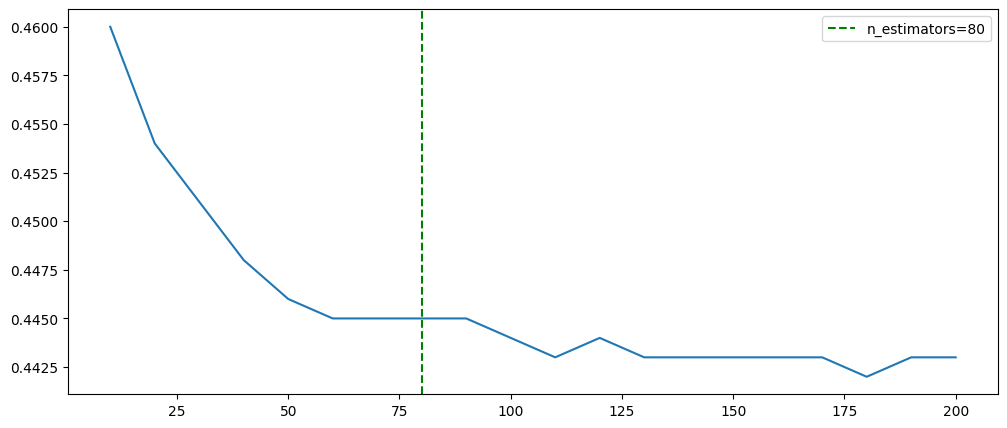

In [47]:
plt.figure(figsize=(12, 5))
plt.axvline(x=80, color='green', linestyle='--', label='n_estimators=80')
plt.plot(df_rmse_values["n_estimators_value"], df_rmse_values["rmse_rounded"])
plt.legend()


Final answer is `80`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [50]:
rmse_results = []

for max_depth in [10, 15, 20, 25]:
    for n_estimators in range(10, 201, 10):
        rf_regressor = RandomForestRegressor(
            max_depth=max_depth,
            n_estimators=n_estimators,
            random_state=1,
            n_jobs=-1
        )

        rf_regressor.fit(X_train, y_train)
        y_val_pred = rf_regressor.predict(X_validation)

        rmse = math.sqrt(np.mean((y_validation - y_val_pred)**2))

        rmse_results.append((max_depth, n_estimators, rmse))

In [69]:
rmse_results[:2]

[(10, 10, 0.4518949820536879), (10, 20, 0.4487193028019679)]

In [54]:
df_rmse_results = pd.DataFrame(rmse_results, columns=["max_depth", "n_estimators", "rmse"])

In [63]:
df_rmse_results["rmse_rounded"] = df_rmse_results["rmse"].round(3)
df_rmse_results.head()

,max_depth,n_estimators,rmse,rmse_rounded
0,10,10,0.451895,0.452
1,10,20,0.448719,0.449
2,10,30,0.446225,0.446
3,10,40,0.443877,0.444
4,10,50,0.442682,0.443


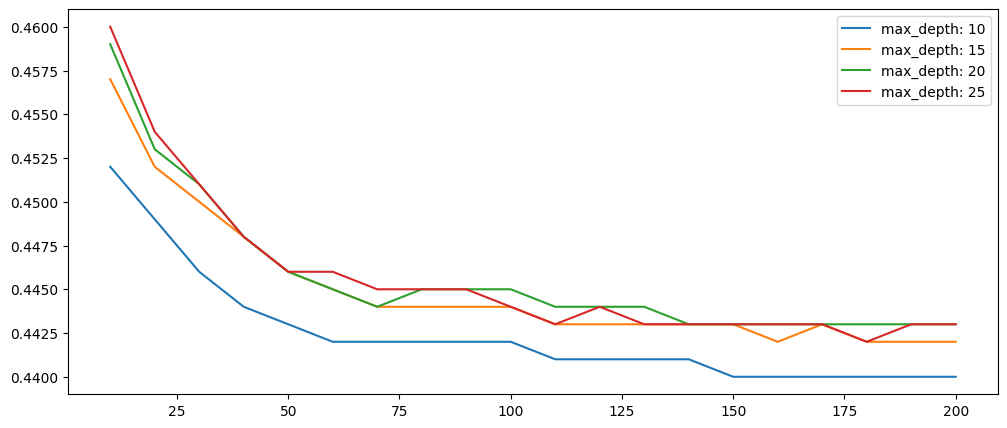

In [ ]:
plt.figure(figsize=(12, 5))

for max_depth in [10, 15, 20, 25]:
    df_subset = df_rmse_results[df_rmse_results["max_depth"] == max_depth]
    plt.plot(df_subset["n_estimators"],
        df_subset["rmse_rounded"],
        label="max_depth: %d" % max_depth)

plt.legend()

In [68]:
print("The best `max_depth` value is `10`")

The best `max_depth` value is `10`


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [71]:
rf_regressor = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

In [72]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
zip(dv. rf_regressor.feature_importances_)

array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

In [75]:
importances = pd.Series(rf_regressor.feature_importances_, index=dv.get_feature_names_out())
importances.sort_values(ascending=False).head()

vehicle_weight         0.959162
horsepower             0.016040
acceleration           0.011471
engine_displacement    0.003269
model_year             0.003182
dtype: float64

In [82]:
decision_tree = export_text(dtr, feature_names=dv.get_feature_names_out())

In [84]:
print(decision_tree[:500])

|--- vehicle_weight <= 3022.11
|   |--- vehicle_weight <= 2505.96
|   |   |--- vehicle_weight <= 2069.91
|   |   |   |--- vehicle_weight <= 1823.19
|   |   |   |   |--- vehicle_weight <= 1549.21
|   |   |   |   |   |--- vehicle_weight <= 1345.62
|   |   |   |   |   |   |--- vehicle_weight <= 1144.81
|   |   |   |   |   |   |   |--- value: [24.97]
|   |   |   |   |   |   |--- vehicle_weight >  1144.81
|   |   |   |   |   |   |   |--- acceleration <= 7.50
|   |   |   |   |   |   |   |   |--- value
